# Projekt III

W pliku `dane.csv` znajdują się dane dotyczące liczby szczepień na COVID-19 w państwach Unii Europejskiej w ostatnim tygodniu 2020 i w pierwszym kwartale 2021 roku (opis do danych znajduje się w `VariableDictionary.pdf`).

### Zadanie 1.
Dla każdego miesiąca 2021 roku opracować wykres słupkowy (`bar chart`) z podziałem na kraje łącznej liczby osób zaszczepionych w danym kraju pierwszą dawką (uwaga na kraje, które raportowały bez podziału na dawki!). Słupki powinny być ustawione w kolejności od najmniejszej do największej liczby osób zaszczepionych.

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("data.csv")
df

,YearWeekISO,FirstDose,FirstDoseRefused,SecondDose,UnknownDose,NumberDosesReceived,Region,Population,ReportingCountry,TargetGroup,Vaccine,Denominator
0,2020-W53,0,0.0,0,0,0.0,AT,8901064,AT,1_Age60+,MOD,2259262.0
1,2020-W53,0,0.0,0,0,0.0,AT,8901064,AT,1_Age60+,AZ,2259262.0
2,2020-W53,2640,0.0,0,0,61425.0,AT,8901064,AT,1_Age60+,COM,2259262.0
3,2020-W53,2363,0.0,0,0,61425.0,AT,8901064,AT,1_Age<60,COM,5099181.0
4,2020-W53,0,0.0,0,0,0.0,AT,8901064,AT,1_Age<60,AZ,5099181.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21377,2021-W13,58142,NaN,6172,0,0.0,SK,5457873,SK,ALL,COM,4437897.0
21378,2021-W13,9329,NaN,1696,0,0.0,SK,5457873,SK,ALL,MOD,4437897.0
21379,2021-W14,2005,NaN,1,0,0.0,SK,5457873,SK,ALL,AZ,4437897.0
21380,2021-W14,26946,NaN,5391,0,0.0,SK,5457873,SK,ALL,COM,4437897.0


In [ ]:
week_iso1 = "2021-W01-1"
date_w1_start = pd.to_datetime(week_iso1, format="%G-W%V-%u")
print(f"W1 w 2021 zaczyna sie {date_w1_start.date()}")

W1 w 2021 zaczyna sie 2021-01-04


In [ ]:
week_iso2 = "2021-W13-1"
date_w13_start = pd.to_datetime(week_iso2, format="%G-W%V-%u")
print(f"W13 w 2021 zaczyna sie {date_w13_start.date()}")

W13 w 2021 zaczyna sie 2021-03-29


In [ ]:
week_iso3 = "2021-W14-1"
date_w14_start = pd.to_datetime(week_iso3, format="%G-W%V-%u")
print(f"W14 w 2021 zaczyna sie {date_w14_start.date()}")

W14 w 2021 zaczyna sie 2021-04-05


In [ ]:
df_2021 = df[(df["YearWeekISO"].str.startswith("2021")) & (df["YearWeekISO"] <= "2021-W13")].copy()
df_2021

,YearWeekISO,FirstDose,FirstDoseRefused,SecondDose,UnknownDose,NumberDosesReceived,Region,Population,ReportingCountry,TargetGroup,Vaccine,Denominator
27,2021-W01,0,0.0,0,0,0.0,AT,8901064,AT,1_Age60+,MOD,2259262.0
28,2021-W01,0,0.0,0,0,0.0,AT,8901064,AT,1_Age60+,AZ,2259262.0
29,2021-W01,7517,0.0,0,0,61425.0,AT,8901064,AT,1_Age60+,COM,2259262.0
30,2021-W01,17939,0.0,0,0,61425.0,AT,8901064,AT,1_Age<60,COM,5099181.0
31,2021-W01,0,0.0,0,0,0.0,AT,8901064,AT,1_Age<60,MOD,5099181.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21374,2021-W12,9440,NaN,4248,0,45600.0,SK,5457873,SK,ALL,MOD,4437897.0
21375,2021-W12,38377,NaN,4,0,12000.0,SK,5457873,SK,ALL,AZ,4437897.0
21376,2021-W13,28376,NaN,56,0,0.0,SK,5457873,SK,ALL,AZ,4437897.0
21377,2021-W13,58142,NaN,6172,0,0.0,SK,5457873,SK,ALL,COM,4437897.0


In [ ]:
df_2021["WeekStart"] = pd.to_datetime(df_2021["YearWeekISO"] + "-1", format="%Y-W%W-%w")
df_2021["Month"] = df_2021["WeekStart"].dt.month

In [ ]:
df_all = df_2021[df_2021["TargetGroup"] == "ALL"]
df_all

,YearWeekISO,FirstDose,FirstDoseRefused,SecondDose,UnknownDose,NumberDosesReceived,Region,Population,ReportingCountry,TargetGroup,Vaccine,Denominator,WeekStart,Month
33,2021-W01,25456,0.0,0,0,61425.0,AT,8901064,AT,ALL,COM,7358443.0,2021-01-04,1
34,2021-W01,0,0.0,0,0,0.0,AT,8901064,AT,ALL,AZ,7358443.0,2021-01-04,1
35,2021-W01,0,0.0,0,0,0.0,AT,8901064,AT,ALL,MOD,7358443.0,2021-01-04,1
60,2021-W02,81632,0.0,372,0,61425.0,AT,8901064,AT,ALL,COM,7358443.0,2021-01-11,1
61,2021-W02,84,0.0,0,0,0.0,AT,8901064,AT,ALL,MOD,7358443.0,2021-01-11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21374,2021-W12,9440,NaN,4248,0,45600.0,SK,5457873,SK,ALL,MOD,4437897.0,2021-03-22,3
21375,2021-W12,38377,NaN,4,0,12000.0,SK,5457873,SK,ALL,AZ,4437897.0,2021-03-22,3
21376,2021-W13,28376,NaN,56,0,0.0,SK,5457873,SK,ALL,AZ,4437897.0,2021-03-29,3
21377,2021-W13,58142,NaN,6172,0,0.0,SK,5457873,SK,ALL,COM,4437897.0,2021-03-29,3


In [ ]:
m_country = df_all.groupby(["Month", "ReportingCountry"]).agg({"FirstDose": "sum","UnknownDose": "sum"}).reset_index()
m_country["EstimatedFirstDose"] = (m_country["FirstDose"] + m_country["UnknownDose"])

<ipython-input-10-a72fdecb88d6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=m_data, x="ReportingCountry", y="EstimatedFirstDose", palette="rainbow")


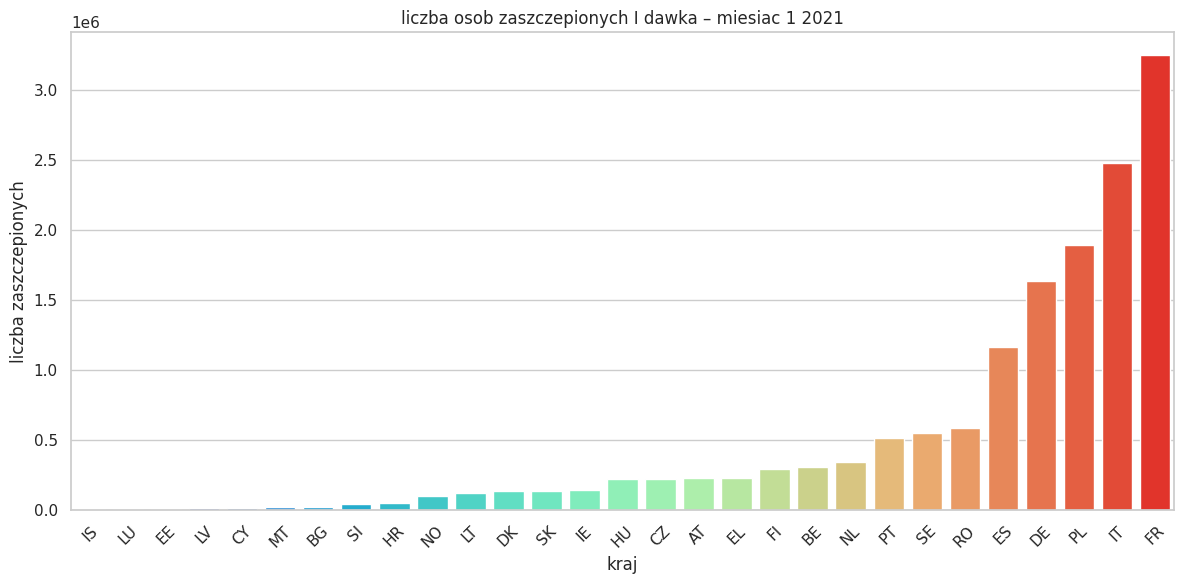

<ipython-input-10-a72fdecb88d6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=m_data, x="ReportingCountry", y="EstimatedFirstDose", palette="rainbow")


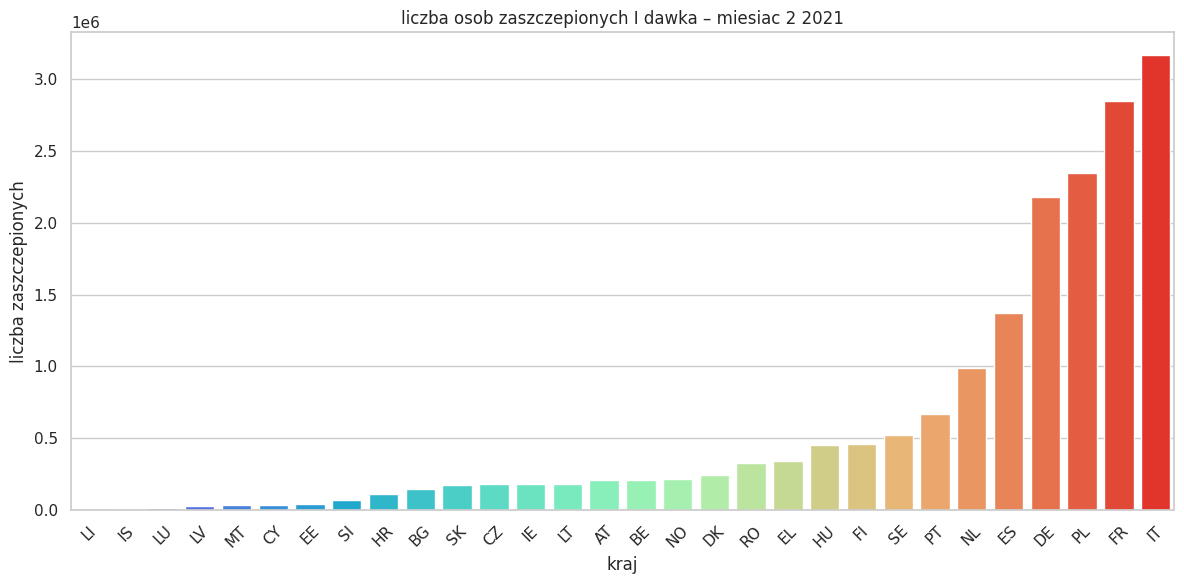

<ipython-input-10-a72fdecb88d6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=m_data, x="ReportingCountry", y="EstimatedFirstDose", palette="rainbow")


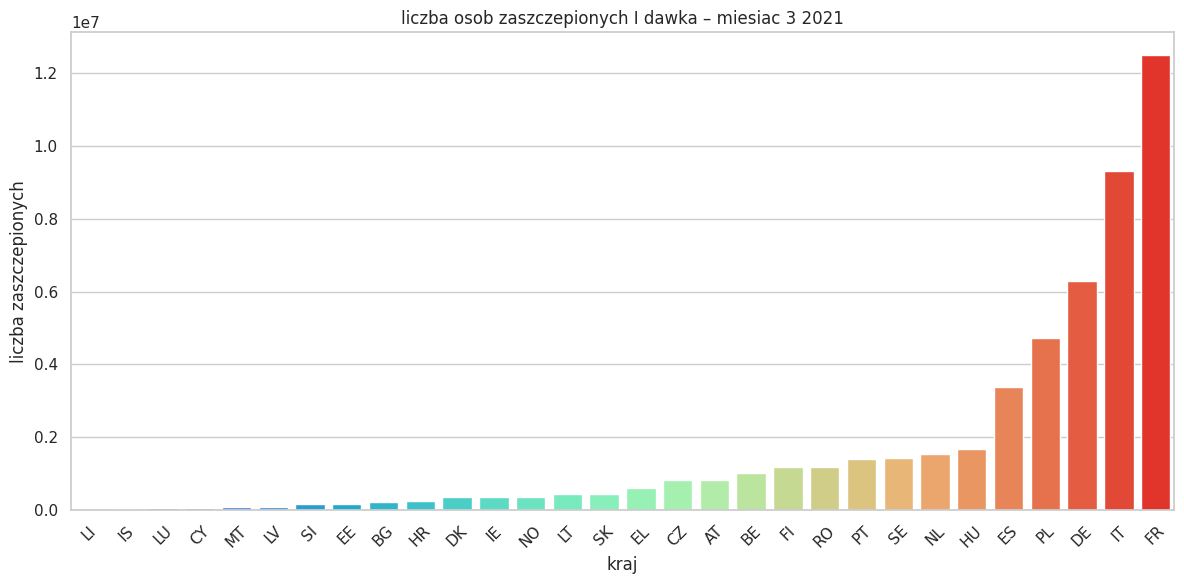

In [ ]:
sns.set(style="whitegrid")
for month in sorted(m_country["Month"].unique()):
  m_data = m_country[m_country["Month"] == month].copy()
  m_data = m_data.sort_values("EstimatedFirstDose")
  plt.figure(figsize=(12,6))
  sns.barplot(data=m_data, x="ReportingCountry", y="EstimatedFirstDose", palette="rainbow")
  plt.title(f"liczba osob zaszczepionych I dawka – miesiac {month} 2021")
  plt.xlabel("kraj")
  plt.ylabel("liczba zaszczepionych")
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

### Zadanie 2.
Opracować wykres liniowy łącznej liczb osób zaszczepionych obydwiema dawkami w każdym tygodniu w wybranych czterech krajach (jedna grafika, cztery wykresy).

In [ ]:
df_all = df[df["TargetGroup"] == "ALL"].copy()
df_all

,YearWeekISO,FirstDose,FirstDoseRefused,SecondDose,UnknownDose,NumberDosesReceived,Region,Population,ReportingCountry,TargetGroup,Vaccine,Denominator
6,2020-W53,5003,0.0,0,0,61425.0,AT,8901064,AT,ALL,COM,7358443.0
7,2020-W53,0,0.0,0,0,0.0,AT,8901064,AT,ALL,MOD,7358443.0
8,2020-W53,0,0.0,0,0,0.0,AT,8901064,AT,ALL,AZ,7358443.0
33,2021-W01,25456,0.0,0,0,61425.0,AT,8901064,AT,ALL,COM,7358443.0
34,2021-W01,0,0.0,0,0,0.0,AT,8901064,AT,ALL,AZ,7358443.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21377,2021-W13,58142,NaN,6172,0,0.0,SK,5457873,SK,ALL,COM,4437897.0
21378,2021-W13,9329,NaN,1696,0,0.0,SK,5457873,SK,ALL,MOD,4437897.0
21379,2021-W14,2005,NaN,1,0,0.0,SK,5457873,SK,ALL,AZ,4437897.0
21380,2021-W14,26946,NaN,5391,0,0.0,SK,5457873,SK,ALL,COM,4437897.0


In [ ]:
df_all["EstimatedSecondDose"] = df_all["SecondDose"]

In [ ]:
countries = ["PL","ES","FR","IT"]

In [ ]:
df_countries = df_all[df_all["ReportingCountry"].isin(countries)]
df_countries

,YearWeekISO,FirstDose,FirstDoseRefused,SecondDose,UnknownDose,NumberDosesReceived,Region,Population,ReportingCountry,TargetGroup,Vaccine,Denominator,EstimatedSecondDose
2753,2020-W53,96419,607.0,0,0,382200.0,ES,47332614,ES,ALL,COM,39006858.0,0
2759,2021-W01,321615,1229.0,0,0,367575.0,ES,47332614,ES,ALL,COM,39006858.0,0
2767,2021-W02,496007,1202.0,2025,0,367575.0,ES,47332614,ES,ALL,COM,39006858.0,2025
2768,2021-W02,7206,7.0,0,0,35700.0,ES,47332614,ES,ALL,MOD,39006858.0,0
2779,2021-W03,18270,2.0,0,0,NaN,ES,47332614,ES,ALL,MOD,39006858.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19493,2021-W14,15889,0.0,623,0,NaN,PL41,37958138,PL,ALL,COM,2803093.0,623
19494,2021-W14,7131,0.0,0,0,NaN,PL41,37958138,PL,ALL,AZ,2803093.0,0
19495,2021-W14,915,0.0,590,0,NaN,PL22,37958138,PL,ALL,MOD,3705960.0,590
19496,2021-W14,26551,0.0,688,0,NaN,PL22,37958138,PL,ALL,COM,3705960.0,688


In [ ]:
week_sec_d = df_countries.groupby(["YearWeekISO", "ReportingCountry"])["SecondDose"].sum().reset_index()
df_p = week_sec_d.pivot(index="YearWeekISO", columns="ReportingCountry", values="SecondDose").fillna(0)

In [ ]:
df_p_cumsum = df_p.cumsum()

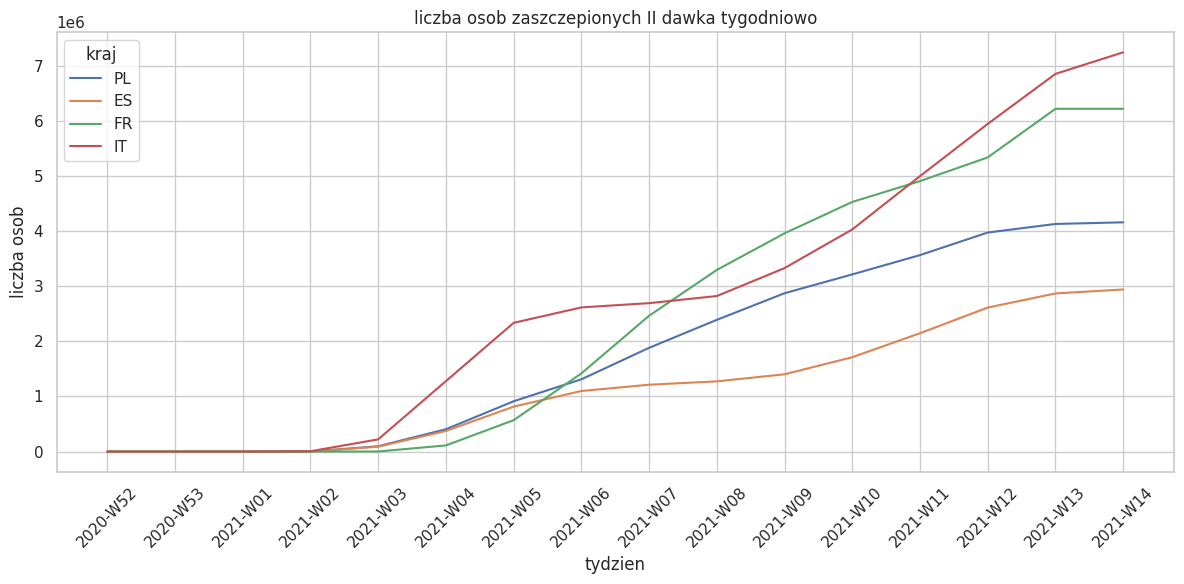

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
for country in countries:
  plt.plot(df_p_cumsum.index, df_p_cumsum[country], label=country)
plt.title("liczba osob zaszczepionych II dawka tygodniowo")
plt.xlabel("tydzien")
plt.ylabel("liczba osob")
plt.xticks(rotation=45)
plt.legend(title="kraj")
plt.tight_layout()
plt.show()

### Zadanie 3.
Opracować wykres liniowy łącznej liczby osób zaszczepionych pierwszą dawką w poszczególnych grupach wiekowych w Polsce w każdym tygodniu.

In [ ]:
df_pl = df[(df["ReportingCountry"] == "PL")]
df_pl

,YearWeekISO,FirstDose,FirstDoseRefused,SecondDose,UnknownDose,NumberDosesReceived,Region,Population,ReportingCountry,TargetGroup,Vaccine,Denominator
12562,2020-W52,0,0.0,0,0,NaN,PL62,37958138,PL,ALL,MOD,1141615.0
12563,2020-W52,152,0.0,0,0,NaN,PL62,37958138,PL,ALL,COM,1141615.0
12564,2020-W52,0,0.0,0,0,NaN,PL62,37958138,PL,ALL,AZ,1141615.0
12565,2020-W52,0,0.0,0,0,NaN,PL61,37958138,PL,ALL,MOD,1679966.0
12566,2020-W52,150,0.0,0,0,NaN,PL61,37958138,PL,ALL,COM,1679966.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19901,2021-W14,5,0.0,6,0,NaN,PL82,37958138,PL,HCW,MOD,NaN
19902,2021-W14,82,0.0,0,0,NaN,PL51,37958138,PL,HCW,AZ,NaN
19903,2021-W14,200,0.0,7,0,NaN,PL51,37958138,PL,HCW,COM,NaN
19904,2021-W14,110,0.0,0,0,NaN,PL92X,37958138,PL,HCW,AZ,NaN


In [ ]:
age_groups = ["Age18_24", "Age25_49", "Age50_59","Age60_69", "Age70_79", "Age80+"]

In [ ]:
df_pl_age = df_pl[df_pl["TargetGroup"].isin(age_groups)]
df_pl_age

,YearWeekISO,FirstDose,FirstDoseRefused,SecondDose,UnknownDose,NumberDosesReceived,Region,Population,ReportingCountry,TargetGroup,Vaccine,Denominator
12613,2020-W52,0,0.0,0,0,NaN,PL21,37958138,PL,Age18_24,MOD,257295.0
12614,2020-W52,0,0.0,0,0,NaN,PL42,37958138,PL,Age18_24,COM,120140.0
12615,2020-W52,0,0.0,0,0,NaN,PL52,37958138,PL,Age18_24,MOD,67721.0
12616,2020-W52,1,0.0,0,0,NaN,PL52,37958138,PL,Age18_24,COM,67721.0
12617,2020-W52,0,0.0,0,0,NaN,PL62,37958138,PL,Age18_24,MOD,109948.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19799,2021-W14,543,0.0,57,0,NaN,PL82,37958138,PL,Age80+,COM,93154.0
19800,2021-W14,4,0.0,31,0,NaN,PL82,37958138,PL,Age80+,MOD,93154.0
19801,2021-W14,30,0.0,399,0,NaN,PL92X,37958138,PL,Age80+,MOD,NaN
19802,2021-W14,1510,0.0,55,0,NaN,PL21,37958138,PL,Age80+,COM,151570.0


In [ ]:
week_age = df_pl_age.groupby(["YearWeekISO", "TargetGroup"])["FirstDose"].sum().reset_index()

In [ ]:
df_p = week_age.pivot(index="YearWeekISO", columns="TargetGroup", values="FirstDose").fillna(0)
df_p = df_p.sort_index()
df_p_cumsum = df_p.cumsum()

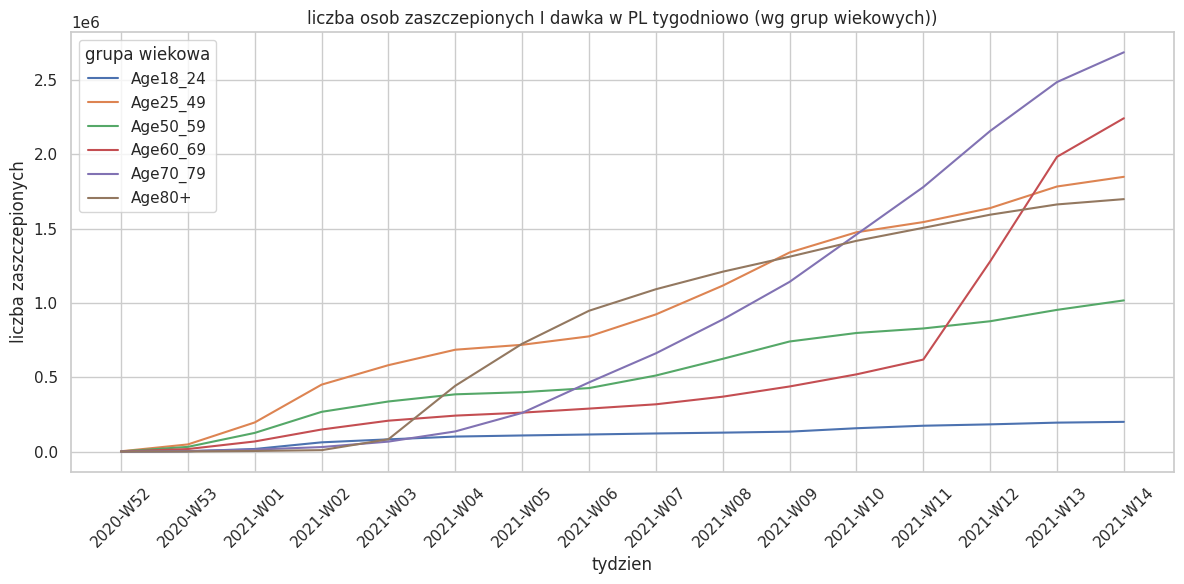

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
for group in age_groups:
  plt.plot(df_p_cumsum.index, df_p_cumsum[group], label=group)
plt.title("liczba osob zaszczepionych I dawka w PL tygodniowo (wg grup wiekowych))")
plt.xlabel("tydzien")
plt.ylabel("liczba zaszczepionych")
plt.xticks(rotation=45)
plt.legend(title="grupa wiekowa")
plt.tight_layout()
plt.show()